<b><i>Date: 25-02-2018</i></b>   
<b><i>Name: Swaroop S Bhat</i></b>

# Implementation of Neural Network and Optimizations

### One Hidden Layer Neural Network for - Moons data set

To understand working of neural network let us start with a sample of simple neural network model with 1 hidden layer using moons400.csv dataset.  
This dataset is having 2 features and binary class label(0 and 1).

##### Algorithm for 1 hidden layer neural network with structured dataset
    1. We will convert the labels through one hot encoding into a format which network can understand. But this step is optional. Not required for simple and numeric labels.
    2. Repeat step 3 to 5 for training set until the end of epoch/iterations
    3. Divide the dataset:
        + 280 instances in training set.
        + 120 instances in testing set.
    4. Using feedforward get sigmoid values for outer layer and hidden layer with initial values of weights and biases
    5. Apply back propagation to get gradients which will update the weights and biases.
    6. After the end of epoch, use the updated weights to predict for test set.
    7. Plot Learning Curves, ROC and Confusion matrix to check performance.

### One Hidden Layer Implementation

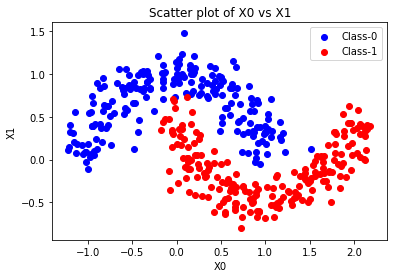

In [132]:
#******************************************************************************************************************************#
#                                           IMPORT DATASET                              
#******************************************************************************************************************************#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection as cv
import math
import matplotlib.pyplot as plt
from sklearn import metrics #To plot confusion matrix
import seaborn as sns #Heat map used for confusion matrix

moons = pd.read_csv(r"moons400.csv")
moons.head()

# Convert Moons table to dataframe
moon = pd.read_csv("moons400.csv")
moon.head()


# Visualising the Moons data set for 2 classes
cla_0 = moon[moon.Class == 0]
cla_1 = moon[moon.Class == 1]
plt.scatter(cla_0["X0"], cla_0["X1"], color="blue", label="Class-0")
plt.scatter(cla_1["X0"], cla_1["X1"], color="red", label="Class-1")
plt.xlabel("X0")
plt.ylabel("X1")
plt.title("Scatter plot of X0 vs X1")
plt.legend()
plt.show()

##### Sigmoid Function
    The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.


Ref: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

In [133]:
class NeuralNet():
    def __init__(self, train, target, x_test, y_test, hidden_layers = 2, neu_hid_layer = 3, learning_rate=0.05, epoch=5000):
        self.train = train.as_matrix() # This is a training data set
        self.target = target # This is target column that needs to be predicted
        self.hidden_layers = hidden_layers 
        self.neu_hid_layer = neu_hid_layer 
        self.in_layer = train.as_matrix().shape[1] 
        self.op_ly = 1
        self.learning_rate = learning_rate 
        self.epoch = epoch
        self.x_test = x_test.as_matrix()
        self.y_test = y_test.as_matrix()
        self.predicted = None
        self.test_pred = None

        np.random.seed(3)
        if self.hidden_layers == 1:
        # Initializing Random Weights
            self.wt_ly1 = np.random.randn(self.in_layer, self.neu_hid_layer)
            self.b_ly1 = np.ones((1, self.neu_hid_layer))
            self.wt_ly2 = np.random.randn(self.neu_hid_layer, self.op_ly)
            self.b_ly2 = np.ones((1, self.op_ly))
        
        elif self.hidden_layers == 2:
            self.wt_ly1 = np.random.randn(self.in_layer, self.neu_hid_layer)
            self.b_ly1 = np.ones((1, self.neu_hid_layer))
            self.wt_ly2 = np.random.randn(self.neu_hid_layer, self.neu_hid_layer)
            self.b_ly2 = np.ones((1, self.neu_hid_layer))
            self.wt_ly3 = np.random.randn(self.neu_hid_layer, self.op_ly)
            self.b_ly3 = np.ones((1, self.op_ly))
            
        
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def gradient_descent(self, tdelta1, tdelta2, tb1, tb2, tdelta3=0, tb3=0): ## Need to see what can be done here
        if self.hidden_layers == 1:
            self.wt_ly1 = self.wt_ly1 - (self.learning_rate*tdelta1)
            self.wt_ly2 = self.wt_ly2 - (self.learning_rate * tdelta2)
            self.b_ly1 = self.b_ly1 - self.learning_rate*tb1
            self.b_ly2 = self.b_ly2 - self.learning_rate*tb2
        
        elif self.hidden_layers == 2:
            self.wt_ly1 = self.wt_ly1 - (self.learning_rate*tdelta1)
            self.wt_ly2 = self.wt_ly2 - (self.learning_rate * tdelta2)
            self.wt_ly3 = self.wt_ly3 - (self.learning_rate * tdelta3)
            self.b_ly1 = self.b_ly1 - self.learning_rate*tb1
            self.b_ly2 = self.b_ly2 - self.learning_rate*tb2
            self.b_ly3 = self.b_ly3 - self.learning_rate*tb3
    
    def propogation(self):
        
        if self.hidden_layers == 1:
            # Forward Propogation
            a1 = np.array(self.train)
            z2 = np.dot(self.train, self.wt_ly1) + self.b_ly1
            a2 = self.activation(z2)
            z3 = np.dot(a2, self.wt_ly2) + self.b_ly2
            a3 = self.activation(z3)
            error = a3 - np.array(self.target).reshape(len(self.target), 1)
        
        
            #Backward Propogation to find derivative
            delta2 = error * a3 * (1-a3)
            delta1 = np.dot(delta2,  self.wt_ly2.T) * a2 * (1-a2) #a2*(1-a2) is derivative of sigmoid function
            tdelta2 = np.dot(a2.T, delta2)
            tdelta1 = np.dot(self.train.T, delta1)
            tb2 = np.sum(delta2, axis=0).reshape(np.shape(self.b_ly2))
            tb1 = np.sum(delta1, axis=0).reshape(np.shape(self.b_ly1))

            # adjust weights by gradient descent
            self.gradient_descent(tdelta1, tdelta2, tb1, tb2)
        
            return a3, error
        
        elif self.hidden_layers == 2:
            #Forward Propogation
            a1 = np.array(self.train)
            z2 = np.dot(self.train, self.wt_ly1) + self.b_ly1
            a2 = self.activation(z2)
            z3 = np.dot(a2, self.wt_ly2) + self.b_ly2
            a3 = self.activation(z3)
            z4 = np.dot(a3, self.wt_ly3) + self.b_ly3
            a4 = self.activation(z4)
            error = a4 - np.array(self.target).reshape(len(self.target), 1)
            
            #Backward Propogation
            delta3 = error * a4 * (1-a4)
            delta2 = np.dot(delta3, self.wt_ly3.T) * a3 * (1-a3)
            delta1 = np.dot(delta2,  self.wt_ly2.T) * a2 * (1-a2) #a2*(1-a2) is derivative of sigmoid function
            
            tdelta3 = np.dot(a3.T, delta3)
            tdelta2 = np.dot(a2.T, delta2)
            tdelta1 = np.dot(self.train.T, delta1)
            tb3 = np.sum(delta3, axis=0).reshape(np.shape(self.b_ly3))
            tb2 = np.sum(delta2, axis=0).reshape(np.shape(self.b_ly2))
            tb1 = np.sum(delta1, axis=0).reshape(np.shape(self.b_ly1))
            
            # adjust weights by gradient descent
            self.gradient_descent(tdelta1, tdelta2, tb1, tb2, tdelta3, tb3)
            
            return a4, error
 
    def train_nn(self):
        TRMSE = []
        display = [2, 4, 5, 500, 1000, 2000, 3000, 4000, 5000, 5999]
        for ep in range(self.epoch):
            out, error = self.propogation()
            self.predicted = out
            RMSE = ((np.sum(error) ** 2)**(1/2))/len(self.target)
            TRMSE.append(RMSE)
            accuracy=1 - RMSE
            if ep in display:
                print("RMSE is: {0:.4f}, Accuracy is:  {1:.4f}, epoch is:{2}".format(RMSE, accuracy, ep))
            
        if self.hidden_layers == 1:
            
            result = {'Weigh1': self.wt_ly1, 
                      'Weight2':self.wt_ly2, 
                      'b1':self.b_ly1, 
                      'b2':self.b_ly2}
            
        elif self.hidden_layers == 2:
            
            result = {'Weigh1': self.wt_ly1, 
                      'Weight2':self.wt_ly2,
                      'Weight3':self.wt_ly3,
                      'b1':self.b_ly1, 
                      'b2':self.b_ly2,
                      'b3': self.b_ly3}
            
        #print("'This is 3 layer Neural Network'\n'Input Layer - 2'\n'Hidden Layer - 1 (3 neurons)\n'Output Layer - 1'\n'Activation Function - Sigmoid'")
        print(result)
        
        return TRMSE


    def predictClass(self):
        if self.hidden_layers == 1:
            # Feed Forward with suitable weights
            a1 = np.array(self.x_test)
            z2 = np.dot(a1, self.wt_ly1)
            a2 = self.activation(z2)
            z3 = np.dot(a2, self.wt_ly2)
            a3 = self.activation(z3)
            self.test_pred = np.round(a3)
        
        elif self.hidden_layers == 2:
            # Feed Forward with suitable weights
            a1 = np.array(self.x_test)
            z2 = np.dot(a1, self.wt_ly1) + self.b_ly1
            a2 = self.activation(z2)
            z3 = np.dot(a2, self.wt_ly2) + self.b_ly2
            a3 = self.activation(z3)
            z4 = np.dot(a3, self.wt_ly3) + self.b_ly3
            a4 = self.activation(z4)
            self.test_pred = np.round(a4)

##### Main reason for Neural network approach
For a mixed data points in the vector space and large number of features, it is difficult to use any supervised learning algorithm. Hence, using Neural network it can bifurcate the data points under correct classes.

RMSE is: 0.2032, Accuracy is:  0.7968, epoch is:2
RMSE is: 0.2196, Accuracy is:  0.7804, epoch is:4
RMSE is: 0.2779, Accuracy is:  0.7221, epoch is:5
RMSE is: 0.0023, Accuracy is:  0.9977, epoch is:500
RMSE is: 0.0089, Accuracy is:  0.9911, epoch is:1000
RMSE is: 0.0041, Accuracy is:  0.9959, epoch is:2000
RMSE is: 0.0057, Accuracy is:  0.9943, epoch is:3000
RMSE is: 0.0046, Accuracy is:  0.9954, epoch is:4000
{'Weigh1': array([[-5.36085851,  9.44972042, -5.56383049],
       [-3.84664561, -4.46791257,  3.50668196]]), 'Weight2': array([[-3.86077253, -9.25311894, -5.35357639],
       [-3.48716792, -4.73121698, -2.83583142],
       [ 3.99568827,  8.87323725,  5.14408719]]), 'Weight3': array([[ -5.62594057],
       [-12.29777849],
       [ -6.46425694]]), 'b1': array([[ 4.72716701,  4.50082246,  7.14804687]]), 'b2': array([[ 1.72207673,  2.47115664,  1.21027816]]), 'b3': array([[ 9.91076611]])}


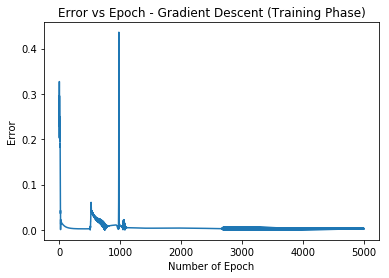

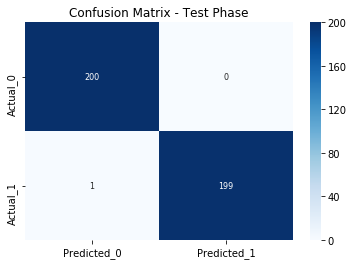

Test Accuracy:  0.9975


In [134]:
 # Splitting the data for testing and training of neural networks (70 % training data and 30% testing data)
#x_train, x_test, y_train, y_test = cv.train_test_split(moon[["X0", "X1"]], moon["Class"], test_size=0.30, random_state=50)
x = moon[["X0", "X1"]]
y = moon["Class"]
x_train = x
y_train = y
x_test = x_train
y_test = y_train
inst = NeuralNet(x_train, y_train, x_test, y_test)

def main():
    trmse = inst.train_nn()
    inst.predictClass()
    plt.plot(trmse)
    plt.xlabel("Number of Epoch")
    plt.ylabel("Error")
    plt.title("Error vs Epoch - Gradient Descent (Training Phase)")
    plt.show()
    
    ax=plt.axes()
    arr = metrics.confusion_matrix(inst.y_test, inst.test_pred, sample_weight=None)
    con_df = pd.DataFrame(arr, columns = ["Predicted_0", "Predicted_1"], index=["Actual_0", "Actual_1"])
    sns.heatmap(con_df, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', ax=ax)
    ax.set_title('Confusion Matrix - Test Phase')
    plt.show()
    print('Test Accuracy: ', 1-np.sum(abs(inst.test_pred - inst.y_test.reshape(len(inst.y_test), 1)))/len(inst.y_test))
  

if __name__ == '__main__':
    main()

## MNIST Digit Recognition with 3 and 9 (works for 1 or 2 hidden layers):
<b>We will use subset of original dataset for our neural network mdoel. 7000 training data and 1000 testing data.</b>

Note: All below mentioned optimizations is created in seperate codes to increase the readabilty.
  
<b>Optimisation Used:</b>
<li>Implemented 2 hidden layers. Code runs for both 1 and 2 hidden layers and any number of nodes in hidden layer.</li>
<li>Batch Gradient Descent with sigmoid activation.</li>
<li>Mini Batch Gradient Descent with sigmoid activation.</li>
<li>Adam Optimisation with sigmoid activation.</li>
<li>Adam Optimisation with ReLU activation.</li>
<li>Principal Component Analysis (PCA) for feature reduction.</li>
<li>Model Comparisions.</li>

### Data Preprocessing
    - Unzipped MNIST data is stored in folder called samples in home directory.
    - Loaded the testing and training data using MNIST library.
    - Laoding training features and corresponding labels.
    - Loading Testing features and corresponding labels.
    - Randomly shuffling the data and Normalising the training features (max normalisation from sckit learn package).
    - Converting training labels and test labels to binary (0 for label 3 and 1 for label 9).
    - Conterting training and testing data to matrix or numpy form.
    

In [152]:
# Import Libraries for one hot encoding to convert labels and plotting RMSE and Mean error against epoch to check performance
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt #To plot the reduction in error
import sklearn # To plot ROC
from sklearn import metrics #To plot confusion matrix
import seaborn as sns #Heat map used for confusion matrix
from mnist import MNIST # To unload the ubyte data - Image data set
import itertools
import time

# Load the data set using MNIST library from your local directory
mndata = MNIST('samples')
images1, labels1 = mndata.load_training()
# and
images2, labels2 = mndata.load_testing()

# Merge train dataset with class column
train = pd.DataFrame(images1)
train['Target'] = labels1

# Merge test dataset with class column
test = pd.DataFrame(images2)
test['Target'] = labels2

In [153]:
train = train.loc[(train['Target'] == 3) | (train['Target'] == 9)]
test = test.loc[(test['Target'] == 3) | (test['Target'] == 9)]

# Shuffling the data
train = train.sample(frac=1)
test = test.sample(frac=1)

In [154]:
# Convert all feature attributes or pixels to matrix format
train_y = train["Target"]
train_x = train.drop(['Target'], axis=1).as_matrix()

test_y = test["Target"]
test_x = test.drop(['Target'], axis=1).as_matrix()

# Normalize the features by dividing it with maximum pixel value.
train_x = sklearn.preprocessing.normalize(train_x, norm='max')
test_x = sklearn.preprocessing.normalize(test_x, norm='max')

# Converting labels to numpy array
train_y = np.asarray(train_y).reshape(len(train_y), 1)
test_y = np.asarray(test_y).reshape(len(test_y), 1)
train_y = np.where(train_y == 3, 0, 1).reshape(len(train_y), 1)
test_y = np.where(test_y == 3, 0, 1).reshape(len(test_y), 1)

In [155]:
# Selecting 7000 data for training and 1000 instances for testing
train_x = train_x[:7000]
train_y = train_y[:7000]
test_x = test_x[:1000]
test_y = test_y[:1000]

### Optimization 1 - Batch Gradient Descent

    Batch gradient descent computes the gradient using the whole dataset. 
    Batch gradient descent, computes the gradient of the cost function w.r.t. to the parameters θ for the entire training dataset:
    θ=θ−η⋅∇J(θ).
    As we need to calculate the gradients for the whole dataset to perform just one update, batch gradient descent can be very slow and is intractable for datasets that don't fit in memory.    
    
#### Algorithm
    1. Initialize Weights and Biases
    2. For each iteration in epoch:
        *  Consider entire training features as an input. 
        *  Feedforward: Get activation values using sigmoid function for each layer.
        *   Back Propagation: Get error in output layer and calculate derivative of error in each hidden layers.
                    -  Gradients: use these gradients to update previous value of weights and biases.
    3. Use the updated weights and biases in feed forward to predict labels for test set. 

In [139]:
#0.0009 and 200
#Learning rate should be of 0.0009 i.e. any number with 3 decimal number
class NeuralNet():
    def __init__(self, train_x, train_y, test_x, 
                 test_y, hidden_layers = 2, hidden_node = 200, learning_rate=0.0009, epoch=70, regParam=0.01):
        self.op_node = 1                        # for binary classifier required output node should be 1.
        self.learning_rate= learning_rate       # learning rate requied to apply on gradients
        self.hidden_node = hidden_node          # number of hidden nodes in each layer
        self.hidden_layers = hidden_layers      # number of hidden layers ie. 1 or 2
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.input_node = train_x.shape[1]      # number of input nodes......ideally should be 784 
        self.epoch = epoch                      # number of training epochs required 
        self.train_predict = None               # to predict for training set
        self.error = None                       # difference in actual and predict in training set 
        self.test_predict = None                # to predict for testing set
        self.regParam = regParam                # regularisation term to control weight values
        self.rmse = None                        # Root mean squared error 
        self.root_mse = None                    # Mean squared error

        np.random.seed(15)
        # Initialising Random Weights and biases
        if self.hidden_layers == 1:
            self.w1_ly1 = np.random.randn(self.input_node, self.hidden_node) # shape is (784, number of hid. nodes in 1st layer)
            self.b1_ly1 = np.zeros((1, self.hidden_node))                    # shape is (1, number of hid. nodes in 1st layer)
            self.w2_ly2 = np.random.randn(self.hidden_node, self.op_node)    # shape is (number of hid. nodes in 1st layer, 1)
            self.b2_ly2 = np.zeros((1, self.op_node))                        # shape is (1, 1)
        
        if self.hidden_layers == 2:
            self.w1_ly1 = np.random.randn(self.input_node, self.hidden_node) # shape is (784, number of hid. nodes in 1st layer)
            self.b1_ly1 = np.zeros((1, self.hidden_node))                    # shape is (1, number of hid. nodes in 1st layer)
            self.w2_ly2 = np.random.randn(self.hidden_node, self.hidden_node)# shape is (number of hid. nodes in 1st layer, 
                                                                             #           number of hid. nodes in 2nd layer)
            self.b2_ly2 = np.zeros((1, self.hidden_node))                    # shape is (1, number of hid. nodes in 2nd layer)
            self.w3_ly3 = np.random.randn(self.hidden_node, self.op_node)    # shape is (number of hid. nodes in 2nd layer, 1)
            self.b3_ly3 = np.zeros((1, self.op_node))                        # shape is (1, 1)
            
    
    # use the same sigmoid function from moon.py
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
    
#****************************************************************************************************************************#        
    # minimise weights and biases using delta values derived from backpropogation
    # We will introduce regularisation parameter(regParam) of 0.01 to avoid overfitting problem by 
    #         restricting the weights to certain limit. 
    # To update weights W = W - learning_rate*(delta + (0.01 * W))
    # To update bias b = b - learning_rate*(delta)
    def gradient_descent(self, tdelta1, tdelta2, tb1, tb2, tdelta3=0, tb3=0):
        if self.hidden_layers == 1:
            self.w1_ly1 = self.w1_ly1 - self.learning_rate*(tdelta1 + (self.regParam * self.w1_ly1))
            self.w2_ly2 = self.w2_ly2 - self.learning_rate*(tdelta2 + (self.regParam * self.w2_ly2))
            self.b1_ly1 = self.b1_ly1 - self.learning_rate*tb1
            self.b2_ly2 = self.b2_ly2 - self.learning_rate*tb2
            
        if self.hidden_layers == 2:
            self.w1_ly1 = self.w1_ly1 - self.learning_rate*(tdelta1 + (self.regParam * self.w1_ly1))
            self.w2_ly2 = self.w2_ly2 - self.learning_rate*(tdelta2 + (self.regParam * self.w2_ly2))
            self.w3_ly3 = self.w3_ly3 - self.learning_rate*(tdelta3 + (self.regParam * self.w3_ly3))
            self.b1_ly1 = self.b1_ly1 - self.learning_rate*tb1
            self.b2_ly2 = self.b2_ly2 - self.learning_rate*tb2
            self.b3_ly3 = self.b3_ly3 - self.learning_rate*tb3
        
#****************************************************************************************************************************#        
# Training Batch Gradient Descent Model
    def trainNN(self):
        rmse = []
        root_mse = []
        for ep in range(self.epoch):
            if self.hidden_layers == 1:
                # Step 1: Forward Feed Working
                # For each layer from network, Perform:
                #     z = Wx + b
                #     sigmoid(z)
                # Get mean error and RMSE to check performance later on
                a1 = self.train_x                                # 784 input nodes
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1       # z = Wx + b
                a2 = self.activation(z2)                         # Perform sigmoid(z)
                
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                error = a3 - self.train_y                        # Error = Prediction - Actual
                
                mean_error = np.sum(error)/len(error)
                rmse.append(mean_error)                          
                root_error = np.sqrt(np.sum(error**2)/len(error))
                root_mse.append(root_error)
                
                # Step 2: Backward propogation Working
                # It involves 2 task.
                #      getting delta valu for output layer
                #      getting delta value for inner layers 
                delta2 = error*a3*(1-a3)  # a3*(1-a3) is same as derivative of sigmoid finction
                                          # delta2 is the error value for output layer  
                delta1 = np.dot(delta2, self.w2_ly2.T)*a2*(1 - a2)
                                          # delta1 is the error value for input layer            
                tdelta2 = np.dot(a2.T, delta2)
                                          # derived gradients for output layer  
                tdelta1 = np.dot(self.train_x.T, delta1)
                                          # derived gradients for input layer    
                tb2 = np.sum(delta2, axis=0).reshape(1, self.op_node)
                tb1 = np.sum(delta1,axis=0).reshape(1, self.hidden_node)
                
                # Now minimise weights and biases using above gradient values
                self.gradient_descent(tdelta1, tdelta2, tb1, tb2)
                self.train_predict = a3
            
            if self.hidden_layers == 2:
                # Step 1: Forward Feed Working
                # For each layer from network, Perform:
                #     z = Wx + b
                #     sigmoid(z)
                # Get mean error and RMSE to check performance later on
                a1 = self.train_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.activation(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                z4 = np.dot(a3, self.w3_ly3) + self.b3_ly3
                a4 = self.activation(z4)
                error = a4 - self.train_y
                self.error = error
                
                mean_error = np.sum(error)/len(error)
                rmse.append(mean_error)
                root_error = np.sqrt(np.sum(error**2)/len(error))
                root_mse.append(root_error)
                
                # Step 2: Backward propogation Working
                # It involves 2 task.
                #      getting delta value for output layer
                #      getting delta value for inner layers 
                delta3 = error*a4*(1-a4)
                delta2 = np.dot(delta3, self.w3_ly3.T)*a3*(1 - a3)
                delta1 = np.dot(delta2, self.w2_ly2.T)*a2*(1 - a2)
                tdelta3 = np.dot(a3.T, delta3)
                tdelta2 = np.dot(a2.T, delta2)
                tdelta1 = np.dot(self.train_x.T, delta1)
                tb3 = np.sum(delta3, axis=0).reshape(1, self.op_node)
                tb2 = np.sum(delta2,axis=0).reshape(1, self.hidden_node)
                tb1 = np.sum(delta1,axis=0).reshape(1, self.hidden_node)
                self.gradient_descent(tdelta1, tdelta2, tb1, tb2, tdelta3, tb3)
                self.train_predict = a4
                
                # Let us check accuracy at regular intervals
                if ep in [1, 4, 6, 10, 20, 30, 40, 50, 60, 69]:
                    accuracy = 1-np.sum(abs(error))/len(error)
                    print("Training Accuracy is:  {0:.4f}, for epoch:{1}".format(accuracy, ep))
                    
        self.rmse = rmse
        self.root_mse = root_mse
        
#****************************************************************************************************************************#                
# Let us use final values of Weights and Biases from Batch Gradient Descent to predict values for held out test set    
    
    def predict_digit(self):
        
        if self.hidden_layers == 1:
                # Forward Feed Working
                # For each layer from network, Perform:
                #     z = Wx + b
                #     sigmoid(z)
                a1 = self.test_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.activation(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                
                self.test_predict = np.round(a3)
        
        if self.hidden_layers == 2:
                # Forward Feed Working
                # For each layer from network, Perform:
                #     z = Wx + b
                #     sigmoid(z)
                a1 = self.test_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.activation(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                z4 = np.dot(a3, self.w3_ly3) + self.b3_ly3
                a4 = self.activation(z4)
                
                self.test_predict = np.round(a4)

Training Accuracy is:  0.4894, for epoch:1
Training Accuracy is:  0.4894, for epoch:4
Training Accuracy is:  0.4902, for epoch:6
Training Accuracy is:  0.6553, for epoch:10
Training Accuracy is:  0.9029, for epoch:20
Training Accuracy is:  0.9244, for epoch:30
Training Accuracy is:  0.9358, for epoch:40
Training Accuracy is:  0.9431, for epoch:50
Training Accuracy is:  0.9482, for epoch:60
Training Accuracy is:  0.9517, for epoch:69


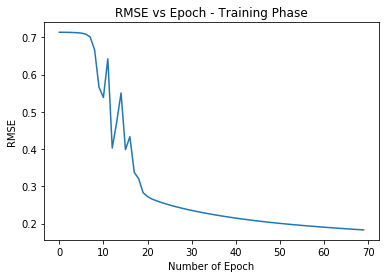

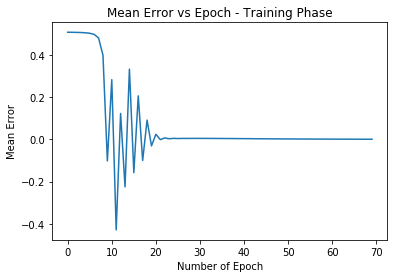

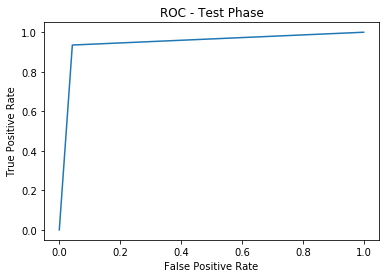

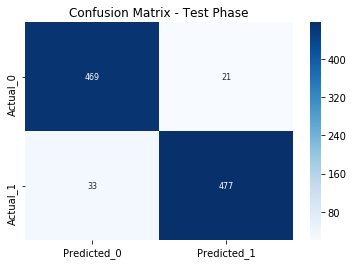

Test Accuracy:  0.946
Elapsed Time For Training is:  30.23016667366028


In [140]:
# Implementation of Batch Gradient Descent
#*****************************************************************************************

start_time = time.time()                              # set a timer to check execution time for batch gradient descent

# Starting model with training of network
batch = NeuralNet(train_x, train_y, test_x, test_y)
batch.trainNN()

# Use the trained model to predict digits
# Testing the model once we have statisfied with the result of training
# Note: Test set or held out set is never used to evaluate the model during the training phase.
batch.predict_digit()

# Check performance by plotting RMSE and Mean Error (Mean Error can be -ve or +ve)
plt.plot(batch.root_mse)
plt.title("RMSE vs Epoch - Training Phase")
plt.xlabel("Number of Epoch")
plt.ylabel("RMSE")
plt.show()

plt.plot(batch.rmse)
plt.title("Mean Error vs Epoch - Training Phase")
plt.xlabel("Number of Epoch")
plt.ylabel("Mean Error")
plt.show()

# Ploting ROC curve for testing phase or model evaluation
fpr, tpr, thresholds = sklearn.metrics.roc_curve(batch.test_y, batch.test_predict, 
                                                 pos_label=None, sample_weight=None, drop_intermediate=True)
plt.plot(fpr, tpr)
plt.title("ROC - Test Phase")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Generate Confusion Matrix
ax=plt.axes()
arr = metrics.confusion_matrix(batch.test_y, batch.test_predict, sample_weight=None)
con_df = pd.DataFrame(arr, columns = ["Predicted_0", "Predicted_1"], index=["Actual_0", "Actual_1"])
sns.heatmap(con_df, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Test Phase')
plt.show()

# Print Test Accuracy
accgd = 1-np.sum(abs(batch.test_y - batch.test_predict))/len(batch.test_predict)
print('Test Accuracy: ', accgd)
elapsed_time1 = time.time() - start_time
print("Elapsed Time For Training is: ", elapsed_time1)


    Hence from test set of 1000, (38 + 16) instances were wrongly predicted. Hence it gives accuracy of 94.6 %.

### Optimization 2 - Mini Batch Gradient Descent
    This is similar to stochastic gradient descent, where set of batches are taken to update weights instead of single 
    instance of training set. Hence, it is faster than stochastic gradient descent and slower than gradient descent 
    (entire traing set is considered as one batch). As a result it is possible that mini batch gradient descent converges 
    faster than batch gradient descent.
    
    

#### Algorithm
    1. Initialize Weights and Biases.
        2. For each iteration in epoch:
            - Create Multiple batches here 7 batches are created.
            - For each iteration in batch:
                *  Consider the current batch. 
                *  Feedforward: Get activation values using sigmoid function for each layer.
                *  Back Propagation: Get error in output layer and calculate derivative of error in each hidden layers.
                    +  Gradients: use these gradients to update previous value of weights and biases.
                * Continue the above processs for all remaining batches and update weights.
        3. Use the updated weights and biases in feed forward to predict labels for test set. 

Ref: https://www.coursera.org/learn/machine-learning/lecture/9zJUs/mini-batch-gradient-descent

In [141]:
#0.0009 and 200
class NeuralNet():
    def __init__(self, train_x, train_y, test_x, 
                 test_y, hidden_layers = 2, hidden_node = 200, learning_rate=0.0009, epoch=70, regParam=0.01):
        self.op_node = 1                            # for binary classifier required output node should be 1.
        self.learning_rate= learning_rate           # learning rate requied to apply on gradients
        self.hidden_node = hidden_node              # number of hidden nodes in each layer
        self.hidden_layers = hidden_layers          # number of hidden layers ie. 1 or 2
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.input_node = train_x.shape[1]          # number of input nodes......ideally should be 784 
        self.epoch = epoch                          # number of training epochs required 
        self.train_predict = None                   # to predict for training set - training phase
        self.error = None                           # difference in actual and predict in training set 
        self.test_predict = None                    # to predict for testing set
        self.regParam = regParam                    # regularisation term to control weight values
        self.rmse = None                            # Root mean squared error 
        self.root_mse = None                        # Mean squared error

        np.random.seed(15)
        # Initialising Random Weights
        if self.hidden_layers == 1:
            self.w1_ly1 = np.random.randn(self.input_node, self.hidden_node) # shape is (784, number of hid. nodes in 1st layer)
            self.b1_ly1 = np.zeros((1, self.hidden_node))                    # shape is (1, number of hid. nodes in 1st layer)
            self.w2_ly2 = np.random.randn(self.hidden_node, self.op_node)    # shape is (number of hid. nodes in 1st layer, 1)
            self.b2_ly2 = np.zeros((1, self.op_node))                        # shape is (1, 1)
        
        if self.hidden_layers == 2:
            self.w1_ly1 = np.random.randn(self.input_node, self.hidden_node) # shape is (784, number of hid. nodes in 1st layer)
            self.b1_ly1 = np.zeros((1, self.hidden_node))                    # shape is (1, number of hid. nodes in 1st layer)
            self.w2_ly2 = np.random.randn(self.hidden_node, self.hidden_node)# shape is (number of hid. nodes in 1st layer,
                                                                             #          number of hid. nodes in 2nd layer)
            self.b2_ly2 = np.zeros((1, self.hidden_node)) 
            self.w3_ly3 = np.random.randn(self.hidden_node, self.op_node)    # shape is (1, number of hid. nodes in 2nd layer)
            self.b3_ly3 = np.zeros((1, self.op_node))                        # shape is (1, 1)
            
    # using sigmoid as activation function     
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
        

#****************************************************************************************************************************#        
    # Mini bactch gradient descent is used to update the weights in batches of 7
    # Update weights and biases using delta values derived from backpropogation
    # We will introduce regularisation parameter(regParam) of 0.01 to avoid overfitting problem by 
    #         restricting the weights to certain limit. 
    # To update weights W = W - learning_rate*(delta + (0.01 * W))
    # To update bias b = b - learning_rate*(delta)
    
    def gradient_descent(self, tdelta1, tdelta2, tb1, tb2, tdelta3=0, tb3=0):
        if self.hidden_layers == 1:
            self.w1_ly1 = self.w1_ly1 - self.learning_rate*(tdelta1 + (self.regParam * self.w1_ly1))
            self.w2_ly2 = self.w2_ly2 - self.learning_rate*(tdelta2 + (self.regParam * self.w2_ly2))
            self.b1_ly1 = self.b1_ly1 - self.learning_rate*tb1
            self.b2_ly2 = self.b2_ly2 - self.learning_rate*tb2
            
        if self.hidden_layers == 2:
            self.w1_ly1 = self.w1_ly1 - self.learning_rate*(tdelta1 + (self.regParam * self.w1_ly1))
            self.w2_ly2 = self.w2_ly2 - self.learning_rate*(tdelta2 + (self.regParam * self.w2_ly2))
            self.w3_ly3 = self.w3_ly3 - self.learning_rate*(tdelta3 + (self.regParam * self.w3_ly3))
            self.b1_ly1 = self.b1_ly1 - self.learning_rate*tb1
            self.b2_ly2 = self.b2_ly2 - self.learning_rate*tb2
            self.b3_ly3 = self.b3_ly3 - self.learning_rate*tb3
    
#****************************************************************************************************************************#
#                                                   TRAINING PHASE
#****************************************************************************************************************************# 
# Training Batch Gradient Descent Model   
    def trainNN(self):
        rmse = []
        root_mse = []
        for ep in range(self.epoch):
            s = 0
            error = []
            act_func = []
            
            for batch in [1000, 2000, 3000, 4000, 5000, 6000, 7000]:
                # Splitting the training data into batches of 7 with 1000 instances each.
                # Weight is updated 7 times for each epoch.
                # Hence this may result in faster convergence than batch gradient descent.
                
                # Creating batches
                train_x = self.train_x[s:batch]
                train_y = self.train_y[s:batch]
                s=s+len(train_x)
                
                if self.hidden_layers == 1:
                    # Step 1: Forward Feed Working
                    # For each layer from network, Perform:
                    #     z = Wx + b
                    #     sigmoid(z)
                    # Get mean error and RMSE to check performance later on
                    a1 = train_x
                    z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                    a2 = self.activation(z2)
                    z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                    a3 = self.activation(z3)
                    er = a3 - train_y
                    error.append(er)

                    # Step 2: Backward propogation Working
                    # It involves 2 task.
                    #      getting delta value for output layer
                    #      getting delta value for inner layers
                    delta2 = er*a3*(1-a3)  # a3*(1-a3) is same as derivative of sigmoid finction
                    delta1 = np.dot(delta2, self.w2_ly2.T)*a2*(1 - a2) # This is derivative of sigmoid function
                    tdelta2 = np.dot(a2.T, delta2)
                    tdelta1 = np.dot(train_x.T, delta1)
                    tb2 = np.sum(delta2, axis=0).reshape(1, self.op_node)
                    tb1 = np.sum(delta1,axis=0).reshape(1, self.hidden_node)
                    self.gradient_descent(tdelta1, tdelta2, tb1, tb2)
                    act_func.append(a3)

                if self.hidden_layers == 2:
                     # Step 1: Forward Feed Working
                    # For each layer from network, Perform:
                    #     z = Wx + b
                    #     sigmoid(z)
                    # Get mean error and RMSE to check performance later on
                    a1 = train_x
                    z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                    a2 = self.activation(z2)
                    z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                    a3 = self.activation(z3)
                    z4 = np.dot(a3, self.w3_ly3) + self.b3_ly3
                    a4 = self.activation(z4)
                    er = a4 - train_y
                    error.append(er)

                    # Step 2: Backward propogation Working
                    # It involves 2 task.
                    #      getting delta value for output layer
                    #      getting delta value for inner layers 
                    delta3 = er*a4*(1-a4)
                    delta2 = np.dot(delta3, self.w3_ly3.T)*a3*(1 - a3)
                    delta1 = np.dot(delta2, self.w2_ly2.T)*a2*(1 - a2)
                    tdelta3 = np.dot(a3.T, delta3)
                    tdelta2 = np.dot(a2.T, delta2)
                    tdelta1 = np.dot(train_x.T, delta1)
                    tb3 = np.sum(delta3, axis=0).reshape(1, self.op_node)
                    tb2 = np.sum(delta2,axis=0).reshape(1, self.hidden_node)
                    tb1 = np.sum(delta1,axis=0).reshape(1, self.hidden_node)
                    self.gradient_descent(tdelta1, tdelta2, tb1, tb2, tdelta3, tb3)
                    act_func.append(a4)
            
            
            # The below code is to flatten the list (error from 7 batches), 
            #          so that error list can be converted into numpy array.
            act_func = list(itertools.chain.from_iterable(act_func))
            error = list(itertools.chain.from_iterable(error))
            act_func = np.asarray(act_func).reshape(len(act_func), 1)
            error = np.asarray(error).reshape(len(error), 1)
            
            
            #Calculation of mean error and rmse
            mean_error = np.sum(error)/len(error)
            rmse.append(mean_error)
            root_error = np.sqrt(np.sum(error**2)/len(error))
            root_mse.append(root_error)
            self.error = np.asarray(error)
            self.train_predict = np.asarray(act_func)
            
            # To keep track of our training.
            if ep in [1, 4, 6, 10, 20, 30, 40, 50, 60, 65, 69]:
                accuracy = 1-np.sum(abs(np.asarray(error)))/len(np.asarray(error))
                print("Accuracy is:  {0:.4f}, for epoch:{1}".format(accuracy, ep))
                    
        self.rmse = rmse
        self.root_mse = root_mse
        
#****************************************************************************************************************************#                
#                                                TESTING or VALIDATION PHASE
#****************************************************************************************************************************#
# Let us use final values of Weights and Biases from Mini Batch Gradient Descent to predict values for held out test set    

    def predict_digit(self):
        
        if self.hidden_layers == 1:
                #Forward Feed
                a1 = self.test_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.activation(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                
                self.test_predict = np.round(a3)
        
        if self.hidden_layers == 2:
                #Forward Propogation
                a1 = self.test_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.activation(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                z4 = np.dot(a3, self.w3_ly3) + self.b3_ly3
                a4 = self.activation(z4)
                
                self.test_predict = np.round(a4) #Rounding off the values

Accuracy is:  0.4894, for epoch:1
Accuracy is:  0.4896, for epoch:4
Accuracy is:  0.5019, for epoch:6
Accuracy is:  0.8109, for epoch:10
Accuracy is:  0.9030, for epoch:20
Accuracy is:  0.9251, for epoch:30
Accuracy is:  0.9362, for epoch:40
Accuracy is:  0.9431, for epoch:50
Accuracy is:  0.9479, for epoch:60
Accuracy is:  0.9499, for epoch:65
Accuracy is:  0.9513, for epoch:69


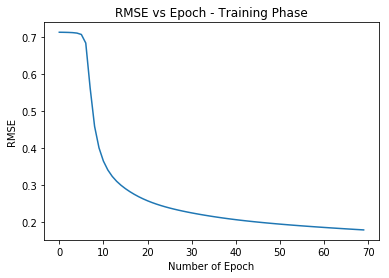

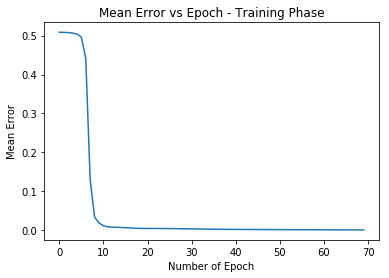

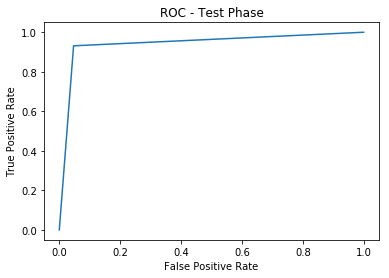

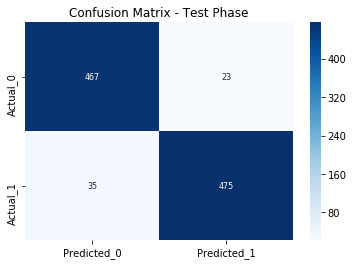

Test Accuracy:  0.942
Elapsed Time For Training is:  31.755859375


In [142]:
# Implementation of Mini Batch Gradient Descent
#*****************************************************************************************

start_time = time.time()                                 # set a timer to check execution time for mini batch gradient descent

# Starting model with training of network
mini = NeuralNet(train_x, train_y, test_x, test_y)
mini.trainNN()

# Use the trained model to predict digits
# Testing the model once we have statisfied with the result of training
# Note: Test set or held out set is never used to evaluate the model during the training phase.
mini.predict_digit()


# Check performance by plotting RMSE and Mean Error (Mean Error can be -ve or +ve)
plt.plot(mini.root_mse)
plt.title("RMSE vs Epoch - Training Phase")
plt.xlabel("Number of Epoch")
plt.ylabel("RMSE")
plt.show()


plt.plot(mini.rmse)
plt.title("Mean Error vs Epoch - Training Phase")
plt.xlabel("Number of Epoch")
plt.ylabel("Mean Error")
plt.show()


# Ploting ROC curve for testing phase or model evaluation
fpr, tpr, thresholds = sklearn.metrics.roc_curve(mini.test_y, mini.test_predict, 
                                                 pos_label=None, sample_weight=None, drop_intermediate=True)
plt.plot(fpr, tpr)
plt.title("ROC - Test Phase")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Generate Confusion Matrix
ax=plt.axes()
arr = metrics.confusion_matrix(mini.test_y, mini.test_predict, sample_weight=None)
con_df = pd.DataFrame(arr, columns = ["Predicted_0", "Predicted_1"], index=["Actual_0", "Actual_1"])
sns.heatmap(con_df, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Test Phase')
plt.show()

# Print Testing Accuracy
accminigd = 1-np.sum(abs(mini.test_y - mini.test_predict))/len(mini.test_predict)
print('Test Accuracy: ',accminigd)
elapsed_time2 = time.time() - start_time
print("Elapsed Time For Training is: ", elapsed_time2)    

### Optimization 3 - Adam Optimization
    Adam is an update to the RMSProp optimizer. In this optimization algorithm, running averages of both the gradients and    the second moments of the gradients are used.
    
#### Algorithm
    1. Initialize Weights and Biases.
        2. For each iteration in epoch:
            - Create Multiple batches here 7 batches are created.
            - For each iteration in batch t:
                Initialize Vdw=0, Sdw=0, Vdb=0, Sdb=0, epsilon = 0.0000001, beta1 = 0.9, beta2 = 0.999
                *  Consider the current batch. 
                *  Feedforward: Get activation values using sigmoid function for each layer.
                *  Back Propagation: Get error in output layer and calculate derivative of error in each hidden layers.
                    - Compute dw, db using current mini batch
                    - Vdw = Beta1*Vdw+(1-Beta1)*dw; Vdb=Beta1*Vdb+(1-Beta1)*db
                    - Sdw = Beta2*Sdw+(1-Beta2)*dw^2; Vdb=Beta1*Sdb+(1-Beta1)*db^2
                    - Compute Vdw corrected = Vdw/(1-Beta1^t); Vdb corrected = Vdb/(1-Beta1^t)
                    - Compute Sdw corrected = Sdw/(1-Beta1^t); Sdb corrected = Sdb/(1-Beta1^t)
                * Update weights.
                    - W = W - alpha*(Vdw corrected/(sqrt(Sdw corrected)+epsilon))
                    - b = b - alpha*(Vdb corrected/(sqrt(Sdb corrected)+epsilon))
        3. Use the updated weights and biases in feed forward to predict labels for test set. 
   
<li>Ref:https://www.youtube.com/watch?v=JXQT_vxqwIs (Andrew Ng)</li>
<li>Ref:https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam (Wiki) </li>

In [143]:
#0.0009 and 200
class NeuralNet():
    def __init__(self, train_x, train_y, test_x, 
                 test_y, hidden_layers = 2, hidden_node = 200, learning_rate=0.0009, epoch=70, regParam=0.01):
        self.op_node = 1                                # for binary classifier required output node should be 1.
        self.learning_rate= learning_rate               # learning rate requied to apply on gradients
        self.hidden_node = hidden_node                  # number of hidden nodes in each layer
        self.hidden_layers = hidden_layers              # number of hidden layers ie. 1 or 2
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.input_node = train_x.shape[1]              # number of input nodes......ideally should be 784 
        self.epoch = epoch                              # number of training epochs required 
        self.train_predict = None                       # to predict for training set
        self.error = None                               # difference in actual and predict in training set
        self.test_predict = None                        # to predict for testing set
        self.regParam = regParam                        # regularisation term to control weight values
        self.rmse = None                                # Root mean squared error 
        self.root_mse = None                            # Mean squared error
        self.t = None

        
        np.random.seed(10)
        # Initialising Random Weights
        if self.hidden_layers == 1:
            self.w1_ly1 = np.random.randn(self.input_node, self.hidden_node)  # shape is (784, number of hid. nodes in 1st layer)
            self.b1_ly1 = np.zeros((1, self.hidden_node))                     # shape is (1, number of hid. nodes in 1st layer)
            self.w2_ly2 = np.random.randn(self.hidden_node, self.op_node)     # shape is (number of hid. nodes in 1st layer, 1)
            self.b2_ly2 = np.zeros((1, self.op_node))                         # shape is (1, 1)
        
        if self.hidden_layers == 2:
            self.w1_ly1 = np.random.randn(self.input_node, self.hidden_node) # shape is (784, number of hid. nodes in 1st layer)
            self.b1_ly1 = np.zeros((1, self.hidden_node))                    # shape is (1, number of hid. nodes in 1st layer)
            self.w2_ly2 = np.random.randn(self.hidden_node, self.hidden_node)# shape is (number of hid. nodes in 1st layer, 
                                                                             #           number of hid. nodes in 2nd layer)
            self.b2_ly2 = np.zeros((1, self.hidden_node))                    # shape is (1, number of hid. nodes in 2nd layer)
            self.w3_ly3 = np.random.randn(self.hidden_node, self.op_node)    # shape is (number of hid. nodes in 2nd layer, 1)
            self.b3_ly3 = np.zeros((1, self.op_node))                        # shape is (1, 1)
            
    
    #Sigmoid Activation Function
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
        
#****************************************************************************************************************************#        
    # Update weights and biases using delta values derived from backpropogation
    #         restricting the weights to certain limit. 
    # To update weights W = W - learning_rate*(Vd corrected + sqrt(Sd corrected + epsilon))
    # To update bias b = b - learning_rate*(Vb corrected + sqrt(Sb corrected + epsilon))  
    
    def adam_gradient_descent(self, vdw1, vdw2, vb1, vb2, sdw1, sdw2, sb1, sb2, vdw3=0, vb3=0, sdw3=0, sb3=0):
        epsilon = 0.0000001
        
        if self.hidden_layers ==1:
            self.w1_ly1 = self.w1_ly1 - self.learning_rate*(vdw1/np.sqrt(sdw1+epsilon))
            self.w2_ly2 = self.w2_ly2 - self.learning_rate*(vdw2/np.sqrt(sdw2+epsilon))
            self.b1_ly1 = self.b1_ly1 - self.learning_rate*(vb1/np.sqrt(sb1+epsilon))
            self.b2_ly2 = self.b2_ly2 - self.learning_rate*(vb2/np.sqrt(sb2+epsilon))
        
        if self.hidden_layers ==2:
            self.w1_ly1 = self.w1_ly1 - self.learning_rate*(vdw1/np.sqrt(sdw1+epsilon))
            self.w2_ly2 = self.w2_ly2 - self.learning_rate*(vdw2/np.sqrt(sdw2+epsilon))
            self.w3_ly3 = self.w3_ly3 - self.learning_rate*(vdw3/np.sqrt(sdw3+epsilon))
            self.b1_ly1 = self.b1_ly1 - self.learning_rate*(vb1/np.sqrt(sb1+epsilon))
            self.b2_ly2 = self.b2_ly2 - self.learning_rate*(vb2/np.sqrt(sb2+epsilon))
            self.b3_ly3 = self.b3_ly3 - self.learning_rate*(vb3/np.sqrt(sb3+epsilon))
        
        
#******************************************************************************************************************************#
#                                                TRAINING PHASE
#******************************************************************************************************************************#
    # Initialising all required parameters for Adam optimization
    def trainNN(self):
        rmse = []
        root_mse = []
        
        for ep in range(self.epoch):
            s = 0
            error = []
            act_func = []
            self.t = 1
            vdw1 = 0
            vdw2 = 0
            vdw3 = 0
            sdw1 = 0
            sdw2 = 0
            sdw3 = 0
            vb1 = 0
            vb2 = 0
            vb3 = 0
            sb1 = 0
            sb2 = 0
            sb3 = 0
            beta1 = 0.9
            beta2 = 0.999
            
            
            for batch in [1000, 2000, 3000, 4000, 5000, 6000, 7000]: # No of batches for mini batch gradient descent
                train_x = self.train_x[s:batch]                      # Creating the the 7 batches as it go throughs the loop
                train_y = self.train_y[s:batch]
                
                s=s+len(train_x)                                     # This is used to calculate V corrected and S corrected
                
                if self.hidden_layers == 1:
                    # Step 1: Forward Feed Working
                    # For each layer from network, Perform:
                    #     z = Wx + b
                    #     sigmoid(z)
                    # Get mean error and RMSE to check performance later on
                    a1 = train_x
                    z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                    a2 = self.activation(z2)
                    z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                    a3 = self.activation(z3)
                    er = a3 - train_y
                    error.append(er)

                    # Step 2: Backward propogation Working
                    # It involves 2 task.
                    #      getting delta value for output layer
                    #      getting delta value for inner layers
                    delta2 = er*a3*(1-a3)  # a3*(1-a3) is same as derivative of sigmoid finction
                    delta1 = np.dot(delta2, self.w2_ly2.T)*a2*(1 - a2)
                    tdelta2 = np.dot(a2.T, delta2)
                    tdelta1 = np.dot(train_x.T, delta1)
                    tb2 = np.sum(delta2, axis=0).reshape(1, self.op_node)
                    tb1 = np.sum(delta1,axis=0).reshape(1, self.hidden_node)
                    act_func.append(a3)
                    
                    # Computinh the all necessary parameters as mentioned in above description
                    self.t = self.t+1
                    vdw1 = ((vdw1*beta1)+((1-beta1)*tdelta1))/(1-beta1**self.t)
                    vdw2 = ((vdw2*beta1)+((1-beta1)*tdelta2))/(1-beta1**self.t)
                    vb1 = ((vb1*beta1)+((1-beta1)*tb1))/(1-beta1**self.t)
                    vb2 = ((vb2*beta1)+((1-beta1)*tb2))/(1-beta1**self.t)
                    sdw1 = ((sdw1*beta2)+((1-beta2)*np.square(tdelta1)))/(1-beta2**self.t)
                    sdw2 = ((sdw2*beta2)+((1-beta2)*np.square(tdelta2)))/(1-beta2**self.t)
                    sb1 = ((sb1*beta2)+((1-beta2)*np.square(tb1)))/(1-beta2**self.t)
                    sb2 = ((sb2*beta2)+((1-beta2)*np.square(tb2)))/(1-beta2**self.t)
                    self.adam_gradient_descent(vdw1, vdw2, vb1, vb2, sdw1, sdw2, sb1, sb2)

                if self.hidden_layers == 2:
                    # Step 1: Forward Feed Working
                    # For each layer from network, Perform:
                    #     z = Wx + b
                    #     sigmoid(z)
                    # Get mean error and RMSE to check performance later o
                    a1 = train_x
                    z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                    a2 = self.activation(z2)
                    z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                    a3 = self.activation(z3)
                    z4 = np.dot(a3, self.w3_ly3) + self.b3_ly3
                    a4 = self.activation(z4)
                    er = a4 - train_y
                    error.append(er)

                    # Step 2: Backward propogation Working
                    # It involves 2 task.
                    #      getting delta value for output layer
                    #      getting delta value for inner layers
                    delta2 = er*a3*(1-a3)  # a3*(1-a3) is same as derivative of sigmoid fincti
                    delta3 = er*a4*(1-a4)
                    delta2 = np.dot(delta3, self.w3_ly3.T)*a3*(1 - a3)
                    delta1 = np.dot(delta2, self.w2_ly2.T)*a2*(1 - a2)
                    tdelta3 = np.dot(a3.T, delta3)
                    tdelta2 = np.dot(a2.T, delta2)
                    tdelta1 = np.dot(train_x.T, delta1)
                    tb3 = np.sum(delta3, axis=0).reshape(1, self.op_node)
                    tb2 = np.sum(delta2,axis=0).reshape(1, self.hidden_node)
                    tb1 = np.sum(delta1,axis=0).reshape(1, self.hidden_node)
                    act_func.append(a4)
                    
                    # Computing the all necessary parameters as mentioned in above description
                    self.t = self.t+1
                    vdw1 = ((vdw1*beta1)+((1-beta1)*tdelta1))/(1-beta1**self.t)
                    vdw2 = ((vdw2*beta1)+((1-beta1)*tdelta2))/(1-beta1**self.t)
                    vdw3 = ((vdw3*beta1)+((1-beta1)*tdelta3))/(1-beta1**self.t)
                    vb1 = ((vb1*beta1)+((1-beta1)*tb1))/(1-beta1**self.t)
                    vb2 = ((vb2*beta1)+((1-beta1)*tb2))/(1-beta1**self.t)
                    vb3 = ((vb3*beta1)+((1-beta1)*tb3))/(1-beta1**self.t)
                    sdw1 = ((sdw1*beta2)+((1-beta2)*np.square(tdelta1)))/(1-beta2**self.t)
                    sdw2 = ((sdw2*beta2)+((1-beta2)*np.square(tdelta2)))/(1-beta2**self.t)
                    sdw3 = ((sdw3*beta2)+((1-beta2)*np.square(tdelta3)))/(1-beta2**self.t)
                    sb1 = ((sb1*beta2)+((1-beta2)*np.square(tb1)))/(1-beta2**self.t)
                    sb2 = ((sb2*beta2)+((1-beta2)*np.square(tb2)))/(1-beta2**self.t)
                    sb3 = ((sb3*beta2)+((1-beta2)*np.square(tb3)))/(1-beta2**self.t)
                    # Calling adam_gradient_descent function to update weights
                    self.adam_gradient_descent(vdw1, vdw2, vb1, vb2, sdw1, sdw2, sb1, sb2, vdw3, vb3, sdw3, sb3)
                    
            # These are used to calculate mean error and rmse for plotting      
            act_func = list(itertools.chain.from_iterable(act_func))
            error = list(itertools.chain.from_iterable(error))
            act_func = np.asarray(act_func).reshape(len(act_func), 1)
            error = np.asarray(error).reshape(len(error), 1)
            mean_error = np.sum(error)/len(error)
            rmse.append(mean_error)
            root_error = np.sqrt(np.sum(error**2)/len(error))
            root_mse.append(root_error)
            self.error = np.asarray(error)
            self.train_predict = np.asarray(act_func)
            
            # To keep track of our training.
            if ep in [1, 4, 6, 10, 20, 30, 40, 50, 60, 65, 69]:
                accuracy = 1-np.sum(abs(np.asarray(error)))/len(np.asarray(error))
                print("Accuracy is:  {0:.4f}, for epoch:{1}".format(accuracy, ep))
                    
        self.rmse = rmse
        self.root_mse = root_mse
        
#*******************************************************************************************************************************#
#                                               TESTING PHASE
#*******************************************************************************************************************************#
        
    def predict_digit(self):
        
        if self.hidden_layers == 1:
                #Forward Feed
                a1 = self.test_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.activation(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                
                self.test_predict = np.round(a3)
        
        if self.hidden_layers == 2:
                #Forward Propogation
                a1 = self.test_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.activation(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                z4 = np.dot(a3, self.w3_ly3) + self.b3_ly3
                a4 = self.activation(z4)
                
                self.test_predict = np.round(a4)

Accuracy is:  0.5095, for epoch:1
Accuracy is:  0.5232, for epoch:4
Accuracy is:  0.5428, for epoch:6
Accuracy is:  0.6174, for epoch:10
Accuracy is:  0.8327, for epoch:20
Accuracy is:  0.9124, for epoch:30
Accuracy is:  0.9425, for epoch:40
Accuracy is:  0.9551, for epoch:50
Accuracy is:  0.9629, for epoch:60
Accuracy is:  0.9669, for epoch:65
Accuracy is:  0.9686, for epoch:69


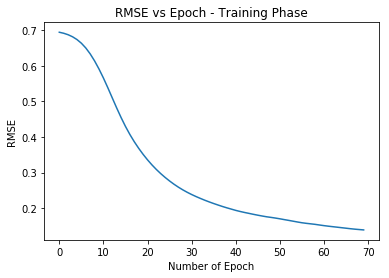

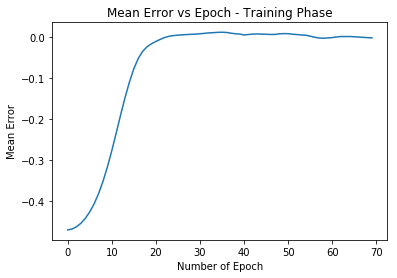

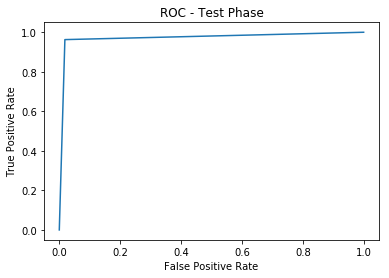

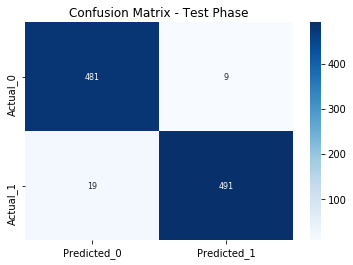

Test Accuracy:  0.972
Elapsed Time For Training is:  41.58455228805542


In [144]:
# Implementation of Adam Optimization
#*****************************************************************************************

start_time = time.time()                                    # Start the time to check the execution time

# Starting model with training of network
adam = NeuralNet(train_x, train_y, test_x, test_y)
adam.trainNN()

# Use the trained model to predict digits
# Testing the model once we have statisfied with the result of training
# Note: Test set or held out set is never used to evaluate the model during the training phase
adam.predict_digit()

# Check performance by plotting RMSE and Mean Error (Mean Error can be -ve or +ve)
plt.plot(adam.root_mse)
plt.title("RMSE vs Epoch - Training Phase")
plt.xlabel("Number of Epoch")
plt.ylabel("RMSE")
plt.show()


plt.plot(adam.rmse)
plt.title("Mean Error vs Epoch - Training Phase")
plt.xlabel("Number of Epoch")
plt.ylabel("Mean Error")
plt.show()

# Ploting ROC curve for testing phase or model evaluation
fpr, tpr, thresholds = sklearn.metrics.roc_curve(adam.test_y, adam.test_predict, 
                                                 pos_label=None, sample_weight=None, drop_intermediate=True)
plt.plot(fpr, tpr)
plt.title("ROC - Test Phase")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Generate Confusion Matrix
ax=plt.axes()
arr = metrics.confusion_matrix(adam.test_y, adam.test_predict, sample_weight=None)
con_df = pd.DataFrame(arr, columns = ["Predicted_0", "Predicted_1"], index=["Actual_0", "Actual_1"])
sns.heatmap(con_df, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Test Phase')
plt.show()

accadam = 1-np.sum(abs(adam.test_y - adam.test_predict))/len(adam.test_predict)
print('Test Accuracy: ', accadam)
elapsed_time3 = time.time() - start_time
print("Elapsed Time For Training is: ", elapsed_time3)

### Optimization 4 - ReLU Activation with Adam Optimization
    Rectifier linear unit or its more widely known name as ReLU becomes popular for the past several years since its performance  and speed. In contrast to other common activation functions, ReLU is a linear function. In other words, its derivative is either 0 or 1.
    i.e.f(x) = max(x, 0)
    
<li>Ref: https://sefiks.com/2017/08/21/relu-as-neural-networks-activation-function/ </li>
<li>Ref: https://github.com/Kulbear/deep-learning-nano-foundation/wiki/ReLU-and-Softmax-Activation-Functions </li>

In [145]:
#0.0009 and 200
#Learning rate should be of 0.0009 i.e. any number with 3 decimal number
class NeuralNet():
    def __init__(self, train_x, train_y, test_x, 
                 test_y, hidden_layers = 2, hidden_node = 200, learning_rate=0.0009, epoch=70, regParam=0.005):
        self.op_node = 1                                        # for binary classifier required output node should be 1.
        self.learning_rate= learning_rate                       # learning rate requied to apply on gradients
        self.hidden_node = hidden_node                          # number of hidden nodes in each layer
        self.hidden_layers = hidden_layers                      # number of hidden layers ie. 1 or 2             
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.input_node = train_x.shape[1]                      # number of input nodes......ideally should be 784
        self.epoch = epoch                                      # number of training epochs required 
        self.train_predict = None                               # to predict for training set
        self.error = None                                       # difference in actual and predict in training set
        self.test_predict = None                                # to predict for testing set
        self.regParam = regParam                                # regularisation term to control weight values
        self.rmse = None                                        # Root mean squared error 
        self.root_mse = None                                    # Mean squared error
        self.t = None                                           

        
        np.random.seed(22)
        # Initialising Random Weights
        if self.hidden_layers == 1:
            self.w1_ly1 = np.random.randn(self.input_node, self.hidden_node)  # shape is (784, number of hid. nodes in 1st layer)
            self.b1_ly1 = np.zeros((1, self.hidden_node))                     # shape is (1, number of hid. nodes in 1st layer)
            self.w2_ly2 = np.random.randn(self.hidden_node, self.op_node)     # shape is (number of hid. nodes in 1st layer, 1)
            self.b2_ly2 = np.zeros((1, self.op_node))                         # shape is (1, 1)
        
        if self.hidden_layers == 2:
            self.w1_ly1 = np.random.randn(self.input_node, self.hidden_node)   # shape is (784, number of hid. nodes in 1st layer)
            self.b1_ly1 = np.zeros((1, self.hidden_node))                      # shape is (1, number of hid. nodes in 1st layer)
            self.w2_ly2 = np.random.randn(self.hidden_node, self.hidden_node)  # shape is (number of hid. nodes in 1st layer, 
            self.b2_ly2 = np.zeros((1, self.hidden_node))                      #           number of hid. nodes in 2nd layer)
            self.w3_ly3 = np.random.randn(self.hidden_node, self.op_node)      # shape is (1, number of hid. nodes in 2nd layer)
            self.b3_ly3 = np.zeros((1, self.op_node))                          # shape is (1, 1)
            
     # Using Sigmoig activation for output node       
    def activation(self, z):
        return 1 / (1 + np.exp(-z))

    # Using ReLU activation for all the nodes in hidden layer
    def ReLU(self, x):
        return np.maximum(x, 0, x)
    
    # Derivative of ReLU
    def dReLU(self, x):
        return np.where(x > 0, 1, 0)
        
#****************************************************************************************************************************#        
    # Update weights and biases using delta values derived from backpropogation
    # To update weights W = W - learning_rate*(Vdw corrected / sqrt(Sdw Corrected+Epsilon))    
    # To update bias b = b - learning_rate*(Vdb corrected / sqrt(Sdb Corrected+Epsilon))    
    
    def adam_gradient_descent(self, vdw1, vdw2, vb1, vb2, sdw1, sdw2, sb1, sb2, vdw3=0, vb3=0, sdw3=0, sb3=0):
        epsilon = 0.0000001
        
        if self.hidden_layers ==1:
            self.w1_ly1 = self.w1_ly1 - self.learning_rate*(vdw1/np.sqrt(sdw1+epsilon))
            self.w2_ly2 = self.w2_ly2 - self.learning_rate*(vdw2/np.sqrt(sdw2+epsilon))
            self.b1_ly1 = self.b1_ly1 - self.learning_rate*(vb1/np.sqrt(sb1+epsilon))
            self.b2_ly2 = self.b2_ly2 - self.learning_rate*(vb2/np.sqrt(sb2+epsilon))
        
        if self.hidden_layers ==2:
            self.w1_ly1 = self.w1_ly1 - self.learning_rate*(vdw1/np.sqrt(sdw1+epsilon))
            self.w2_ly2 = self.w2_ly2 - self.learning_rate*(vdw2/np.sqrt(sdw2+epsilon))
            self.w3_ly3 = self.w3_ly3 - self.learning_rate*(vdw3/np.sqrt(sdw3+epsilon))
            self.b1_ly1 = self.b1_ly1 - self.learning_rate*(vb1/np.sqrt(sb1+epsilon))
            self.b2_ly2 = self.b2_ly2 - self.learning_rate*(vb2/np.sqrt(sb2+epsilon))
            self.b3_ly3 = self.b3_ly3 - self.learning_rate*(vb3/np.sqrt(sb3+epsilon))
        
#******************************************************************************************************************************#
#                                                TRAINING PHASE
#******************************************************************************************************************************#
    # Initialising all required parameters for Adam optimization       
        
    def trainNN(self):
        rmse = []
        root_mse = []
        
        for ep in range(self.epoch):
            s = 0
            error = []
            act_func = []
            self.t = 1
            vdw1 = 0
            vdw2 = 0
            vdw3 = 0
            sdw1 = 0
            sdw2 = 0
            sdw3 = 0
            vb1 = 0
            vb2 = 0
            vb3 = 0
            sb1 = 0
            sb2 = 0
            sb3 = 0
            beta1 = 0.9
            beta2 = 0.999
            
            
            for batch in [1000, 2000, 3000, 4000, 5000, 6000, 7000]: # No of batches for mini batch gradient descent
                train_x = self.train_x[s:batch]                      # Creating the the 7 batches as it go throughs the loop
                train_y = self.train_y[s:batch]
           
                s=s+len(train_x)                                     # This is used to calculate V corrected and S corrected
                
                if self.hidden_layers == 1:
                    # Step 1: Forward Feed Working
                    # For each layer from network, Perform:
                    #     z = Wx + b
                    #     sigmoid(z)
                    # Get mean error and RMSE to check performance later on
                    a1 = train_x
                    z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                    a2 = self.ReLU(z2)
                    z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                    a3 = self.activation(z3)
                    er = a3 - train_y
                    error.append(er)

                    # Step 2: Backward propogation Working
                    # It involves 2 task.
                    #      getting delta value for output layer
                    #      getting delta value for inner layers
                    delta2 = er*a3*(1-a3)  
                    delta1 = np.dot(delta2, self.w2_ly2.T)*self.dReLU(a2)
                    tdelta2 = np.dot(a2.T, delta2)
                    tdelta1 = np.dot(train_x.T, delta1)
                    tb2 = np.sum(delta2, axis=0).reshape(1, self.op_node)
                    tb1 = np.sum(delta1,axis=0).reshape(1, self.hidden_node)
                    act_func.append(a3)
                    
                    # Computing the all necessary parameters as mentioned in Adam Optimization description
                    self.t = self.t+1
                    vdw1 = ((vdw1*beta1)+((1-beta1)*tdelta1))/(1-beta1**self.t)
                    vdw2 = ((vdw2*beta1)+((1-beta1)*tdelta2))/(1-beta1**self.t)
                    vb1 = ((vb1*beta1)+((1-beta1)*tb1))/(1-beta1**self.t)
                    vb2 = ((vb2*beta1)+((1-beta1)*tb2))/(1-beta1**self.t)
                    sdw1 = ((sdw1*beta2)+((1-beta2)*np.square(tdelta1)))/(1-beta2**self.t)
                    sdw2 = ((sdw2*beta2)+((1-beta2)*np.square(tdelta2)))/(1-beta2**self.t)
                    sb1 = ((sb1*beta2)+((1-beta2)*np.square(tb1)))/(1-beta2**self.t)
                    sb2 = ((sb2*beta2)+((1-beta2)*np.square(tb2)))/(1-beta2**self.t)
                    self.adam_gradient_descent(vdw1, vdw2, vb1, vb2, sdw1, sdw2, sb1, sb2)

                if self.hidden_layers == 2:
                   # Step 1: Forward Feed Working
                    # For each layer from network, Perform:
                    #     z = Wx + b
                    #     sigmoid(z)
                    # Get mean error and RMSE to check performance later on
                    a1 = train_x
                    z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                    a2 = self.ReLU(z2)
                    z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                    a3 = self.ReLU(z3)
                    z4 = np.dot(a3, self.w3_ly3) + self.b3_ly3
                    a4 = self.activation(z4)
                    er = a4 - train_y
                    error.append(er)

                     # Step 2: Backward propogation Working
                    # It involves 2 task.
                    #      getting delta value for output layer
                    #      getting delta value for inner layers
                    delta3 = er*a4*(1-a4)
                    delta2 = np.dot(delta3, self.w3_ly3.T)*self.dReLU(a3)
                    delta1 = np.dot(delta2, self.w2_ly2.T)*self.dReLU(a2)
                    tdelta3 = np.dot(a3.T, delta3)
                    tdelta2 = np.dot(a2.T, delta2)
                    tdelta1 = np.dot(train_x.T, delta1)
                    tb3 = np.sum(delta3, axis=0).reshape(1, self.op_node)
                    tb2 = np.sum(delta2,axis=0).reshape(1, self.hidden_node)
                    tb1 = np.sum(delta1,axis=0).reshape(1, self.hidden_node)
                    act_func.append(a4)
                    
                    # Computing the all necessary parameters as mentioned in Adam Optimization description
                    self.t = self.t+1
                    vdw1 = ((vdw1*beta1)+((1-beta1)*tdelta1))/(1-beta1**self.t)
                    vdw2 = ((vdw2*beta1)+((1-beta1)*tdelta2))/(1-beta1**self.t)
                    vdw3 = ((vdw3*beta1)+((1-beta1)*tdelta3))/(1-beta1**self.t)
                    vb1 = ((vb1*beta1)+((1-beta1)*tb1))/(1-beta1**self.t)
                    vb2 = ((vb2*beta1)+((1-beta1)*tb2))/(1-beta1**self.t)
                    vb3 = ((vb3*beta1)+((1-beta1)*tb3))/(1-beta1**self.t)
                    sdw1 = ((sdw1*beta2)+((1-beta2)*np.square(tdelta1)))/(1-beta2**self.t)
                    sdw2 = ((sdw2*beta2)+((1-beta2)*np.square(tdelta2)))/(1-beta2**self.t)
                    sdw3 = ((sdw3*beta2)+((1-beta2)*np.square(tdelta3)))/(1-beta2**self.t)
                    sb1 = ((sb1*beta2)+((1-beta2)*np.square(tb1)))/(1-beta2**self.t)
                    sb2 = ((sb2*beta2)+((1-beta2)*np.square(tb2)))/(1-beta2**self.t)
                    sb3 = ((sb3*beta2)+((1-beta2)*np.square(tb3)))/(1-beta2**self.t)
                    self.adam_gradient_descent(vdw1, vdw2, vb1, vb2, sdw1, sdw2, sb1, sb2, vdw3, vb3, sdw3, sb3)
                    
            # These are used to calculate mean error and rmse for plotting         
            act_func = list(itertools.chain.from_iterable(act_func))
            error = list(itertools.chain.from_iterable(error))
            act_func = np.asarray(act_func).reshape(len(act_func), 1)
            error = np.asarray(error).reshape(len(error), 1)
            mean_error = np.sum(error)/len(error)
            rmse.append(mean_error)
            root_error = np.sqrt(np.sum(error**2)/len(error))
            root_mse.append(root_error)
            self.error = np.asarray(error)
            self.train_predict = np.asarray(act_func)
            
            # This is used to keep track of our training
            if ep in [1, 4, 6, 10, 20, 30, 40, 50, 60, 65, 69]:
                accuracy = 1-np.sum(abs(np.asarray(error)))/len(np.asarray(error))
                print("Accuracy is:  {0:.4f}, for epoch:{1}".format(accuracy, ep))
                    
        self.rmse = rmse
        self.root_mse = root_mse
        
        
#******************************************************************************************************************************#
#                                               TESTING PHASE
#******************************************************************************************************************************#        
    def predict_digit(self):
        
        if self.hidden_layers == 1:
                #Forward propogation for prediction for hidden layer = 1
                a1 = self.test_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.ReLU(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                
                self.test_predict = np.round(a3)
        
        if self.hidden_layers == 2:
                #Forward propogation for prediction for hidden layer = 2
                a1 = self.test_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.ReLU(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.ReLU(z3)
                z4 = np.dot(a3, self.w3_ly3) + self.b3_ly3
                a4 = self.activation(z4)
                
                self.test_predict = np.round(a4)

C:\Users\Swaroop Bhat\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in exp


Accuracy is:  0.7004, for epoch:1
Accuracy is:  0.7438, for epoch:4
Accuracy is:  0.7672, for epoch:6
Accuracy is:  0.8120, for epoch:10
Accuracy is:  0.8670, for epoch:20
Accuracy is:  0.9045, for epoch:30
Accuracy is:  0.9246, for epoch:40
Accuracy is:  0.9404, for epoch:50
Accuracy is:  0.9446, for epoch:60
Accuracy is:  0.9471, for epoch:65
Accuracy is:  0.9491, for epoch:69


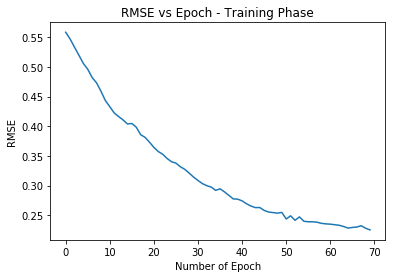

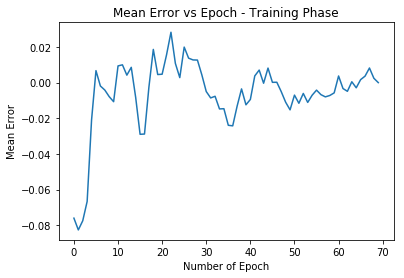

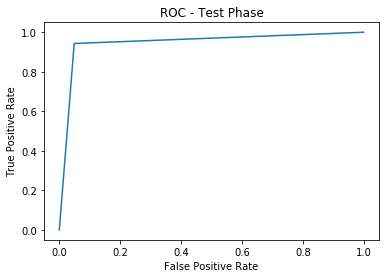

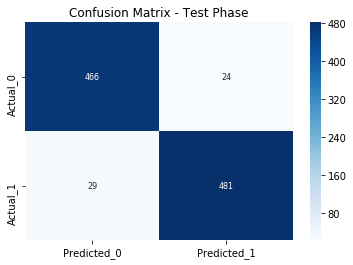

Test Accuracy:  0.947
Elapsed Time For Training is:  34.200576305389404


In [146]:
# Implementation of Adam Optimization with ReLU activation
#*****************************************************************************************

start_time = time.time()                                    # Start the time to check the execution time

# Starting model with training of network
relu = NeuralNet(train_x, train_y, test_x, test_y)
relu.trainNN()

# Use the trained model to predict digits
# Testing the model once we have statisfied with the result of training
# Note: Test set or held out set is never used to evaluate the model during the training phase.
relu.predict_digit()

# Check performance by plotting RMSE and Mean Error (Mean Error can be -ve or +ve)
plt.plot(relu.root_mse)
plt.title("RMSE vs Epoch - Training Phase")
plt.xlabel("Number of Epoch")
plt.ylabel("RMSE")
plt.show()


plt.plot(relu.rmse)
plt.title("Mean Error vs Epoch - Training Phase")
plt.xlabel("Number of Epoch")
plt.ylabel("Mean Error")
plt.show()

# Ploting ROC curve for testing phase or model evaluation
fpr, tpr, thresholds = sklearn.metrics.roc_curve(relu.test_y, relu.test_predict, 
                                                 pos_label=None, sample_weight=None, drop_intermediate=True)
plt.plot(fpr, tpr)
plt.title("ROC - Test Phase")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


# Generate Confusion Matrix
ax=plt.axes()
arr = metrics.confusion_matrix(relu.test_y, relu.test_predict, sample_weight=None)
con_df = pd.DataFrame(arr, columns = ["Predicted_0", "Predicted_1"], index=["Actual_0", "Actual_1"])
sns.heatmap(con_df, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Test Phase')
plt.show()

# Print the accuracy
accrelu = 1-np.sum(abs(relu.test_y - relu.test_predict))/len(relu.test_predict)
print('Test Accuracy: ', accrelu)
elapsed_time4 = time.time() - start_time
print("Elapsed Time For Training is: ", elapsed_time4)

### Optimization 5 - Principal Component Analysis (PCA) - Reduction in Dimensionality
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. In addtion, for image processing we dont need high resolution images to train Neural Network hence we can reduce  the the dimensionality. 
   
   Ref: https://en.wikipedia.org/wiki/Principal_component_analysis.
   
          Procedure to reduce dimensionality:
           - First calculate (X.T * X) i.e find transpose of input matrix and multiply with the same (dot product).
           - Calculate Eigen Values (Lambda) and Eigen Vectors (W) of the above.
           - Eigen Value matrix is a ordered diagnol matrix. Where, each column in W represents principal components
           - 1st principal component correspond to largest eigen value, explains highest variation in data and the 2nd column 
             W represents 2nd principal component corresponding to 2nd largest eigen value and so on.
           - Now we need to select the number of transformed dimensions where it should explain most of the variance.
           - Taking cut off as 95% variance in original data from below graph we are selectingg 400 transformed features to 
             train our model.
           - For this decison we need to plot cummulative sum of eigen values (Lamdbda) in Y axis and number of transformed 
             features in x axis.
           - Selected Number of dimension is 400.
           - Using this transformed features to train Neural Network Model
    
Ref: https://www.youtube.com/watch?v=7WqWoEKUdQY&t=383s

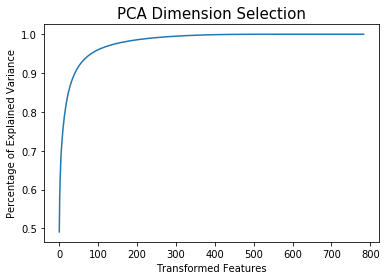

In [147]:
# Training Data
c = np.dot(train_x.T, train_x)
Lambda_tr, W_tr = np.linalg.eig(c)
Lambda_tr = np.real(Lambda_tr)
W_tr = np.real(W_tr)
cum_sum = np.cumsum(Lambda_tr)
per = cum_sum/cum_sum[-1]
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Transformed Features")
plt.title("PCA Dimension Selection",  size=15)
plt.plot(per)
plt.show()

# Testing Data
d = np.dot(test_x.T, test_x)
Lambda_te, W_te = np.linalg.eig(d)
Lambda_te = np.real(Lambda_te)
W_te = np.real(W_te)

In [148]:
Tr_train_x = np.dot(train_x, W_tr[:,:400])
Tr_test_x = np.dot(test_x, W_te[:,:400])

# Transformed Training and Testing data
train_x = Tr_train_x
test_x = Tr_test_x

In [149]:
#0.0009 and 200
class NeuralNet():
    def __init__(self, train_x, train_y, test_x, 
                 test_y, hidden_layers = 2, hidden_node = 90, learning_rate=0.01, epoch=70, regParam=0.01):
        self.op_node = 1                                # for binary classifier required output node should be 1.
        self.learning_rate= learning_rate               # learning rate requied to apply on gradients
        self.hidden_node = hidden_node                  # number of hidden nodes in each layer
        self.hidden_layers = hidden_layers              # number of hidden layers ie. 1 or 2
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.input_node = train_x.shape[1]              # number of input nodes......ideally should be 784 
        self.epoch = epoch                              # number of training epochs required 
        self.train_predict = None                       # to predict for training set
        self.error = None                               # difference in actual and predict in training set
        self.test_predict = None                        # to predict for testing set
        self.regParam = regParam                        # regularisation term to control weight values
        self.rmse = None                                # Root mean squared error 
        self.root_mse = None                            # Mean squared error
        self.t = None

        
        np.random.seed(15)
        # Initialising Random Weights
        if self.hidden_layers == 1:
            self.w1_ly1 = np.random.randn(self.input_node, self.hidden_node)  # shape is (784, number of hid. nodes in 1st layer)
            self.b1_ly1 = np.zeros((1, self.hidden_node))                     # shape is (1, number of hid. nodes in 1st layer)
            self.w2_ly2 = np.random.randn(self.hidden_node, self.op_node)     # shape is (number of hid. nodes in 1st layer, 1)
            self.b2_ly2 = np.zeros((1, self.op_node))                         # shape is (1, 1)
        
        if self.hidden_layers == 2:
            self.w1_ly1 = np.random.randn(self.input_node, self.hidden_node) # shape is (784, number of hid. nodes in 1st layer)
            self.b1_ly1 = np.zeros((1, self.hidden_node))                    # shape is (1, number of hid. nodes in 1st layer)
            self.w2_ly2 = np.random.randn(self.hidden_node, self.hidden_node)# shape is (number of hid. nodes in 1st layer, 
                                                                             #           number of hid. nodes in 2nd layer)
            self.b2_ly2 = np.zeros((1, self.hidden_node))                    # shape is (1, number of hid. nodes in 2nd layer)
            self.w3_ly3 = np.random.randn(self.hidden_node, self.op_node)    # shape is (number of hid. nodes in 2nd layer, 1)
            self.b3_ly3 = np.zeros((1, self.op_node))                        # shape is (1, 1)
            
    
    #Sigmoid Activation Function
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
        
#****************************************************************************************************************************#        
    # Update weights and biases using delta values derived from backpropogation
    #         restricting the weights to certain limit. 
    # To update weights W = W - learning_rate*(Vd corrected + sqrt(Sd corrected + epsilon))
    # To update bias b = b - learning_rate*(Vb corrected + sqrt(Sb corrected + epsilon))  
    
    def adam_gradient_descent(self, vdw1, vdw2, vb1, vb2, sdw1, sdw2, sb1, sb2, vdw3=0, vb3=0, sdw3=0, sb3=0):
        epsilon = 0.0000001
        
        if self.hidden_layers ==1:
            self.w1_ly1 = self.w1_ly1 - self.learning_rate*(vdw1/np.sqrt(sdw1+epsilon))
            self.w2_ly2 = self.w2_ly2 - self.learning_rate*(vdw2/np.sqrt(sdw2+epsilon))
            self.b1_ly1 = self.b1_ly1 - self.learning_rate*(vb1/np.sqrt(sb1+epsilon))
            self.b2_ly2 = self.b2_ly2 - self.learning_rate*(vb2/np.sqrt(sb2+epsilon))
        
        if self.hidden_layers ==2:
            self.w1_ly1 = self.w1_ly1 - self.learning_rate*(vdw1/np.sqrt(sdw1+epsilon))
            self.w2_ly2 = self.w2_ly2 - self.learning_rate*(vdw2/np.sqrt(sdw2+epsilon))
            self.w3_ly3 = self.w3_ly3 - self.learning_rate*(vdw3/np.sqrt(sdw3+epsilon))
            self.b1_ly1 = self.b1_ly1 - self.learning_rate*(vb1/np.sqrt(sb1+epsilon))
            self.b2_ly2 = self.b2_ly2 - self.learning_rate*(vb2/np.sqrt(sb2+epsilon))
            self.b3_ly3 = self.b3_ly3 - self.learning_rate*(vb3/np.sqrt(sb3+epsilon))
        
        
#******************************************************************************************************************************#
#                                                TRAINING PHASE
#******************************************************************************************************************************#
    # Initialising all required parameters for Adam optimization
    def trainNN(self):
        rmse = []
        root_mse = []
        
        for ep in range(self.epoch):
            s = 0
            error = []
            act_func = []
            self.t = 1
            vdw1 = 0
            vdw2 = 0
            vdw3 = 0
            sdw1 = 0
            sdw2 = 0
            sdw3 = 0
            vb1 = 0
            vb2 = 0
            vb3 = 0
            sb1 = 0
            sb2 = 0
            sb3 = 0
            beta1 = 0.9
            beta2 = 0.999
            
            for batch in [1000, 2000, 3000, 4000, 5000, 6000, 7000]: # No of batches for mini batch gradient descent
                train_x = self.train_x[s:batch]                      # Creating the the 7 batches as it go throughs the loop
                train_y = self.train_y[s:batch]
                
                s=s+len(train_x)                                     # This is used to calculate V corrected and S corrected
                
                if self.hidden_layers == 1:
                    # Step 1: Forward Feed Working
                    # For each layer from network, Perform:
                    #     z = Wx + b
                    #     sigmoid(z)
                    # Get mean error and RMSE to check performance later on
                    a1 = train_x
                    z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                    a2 = self.activation(z2)
                    z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                    a3 = self.activation(z3)
                    er = a3 - train_y
                    error.append(er)

                    # Step 2: Backward propogation Working
                    # It involves 2 task.
                    #      getting delta value for output layer
                    #      getting delta value for inner layers
                    delta2 = er*a3*(1-a3)  # a3*(1-a3) is same as derivative of sigmoid finction
                    delta1 = np.dot(delta2, self.w2_ly2.T)*a2*(1 - a2)
                    tdelta2 = np.dot(a2.T, delta2)
                    tdelta1 = np.dot(train_x.T, delta1)
                    tb2 = np.sum(delta2, axis=0).reshape(1, self.op_node)
                    tb1 = np.sum(delta1,axis=0).reshape(1, self.hidden_node)
                    act_func.append(a3)
                    
                    # Computinh the all necessary parameters as mentioned in above description
                    self.t = self.t+1
                    vdw1 = ((vdw1*beta1)+((1-beta1)*tdelta1))/(1-beta1**self.t)
                    vdw2 = ((vdw2*beta1)+((1-beta1)*tdelta2))/(1-beta1**self.t)
                    vb1 = ((vb1*beta1)+((1-beta1)*tb1))/(1-beta1**self.t)
                    vb2 = ((vb2*beta1)+((1-beta1)*tb2))/(1-beta1**self.t)
                    sdw1 = ((sdw1*beta2)+((1-beta2)*np.square(tdelta1)))/(1-beta2**self.t)
                    sdw2 = ((sdw2*beta2)+((1-beta2)*np.square(tdelta2)))/(1-beta2**self.t)
                    sb1 = ((sb1*beta2)+((1-beta2)*np.square(tb1)))/(1-beta2**self.t)
                    sb2 = ((sb2*beta2)+((1-beta2)*np.square(tb2)))/(1-beta2**self.t)
                    self.adam_gradient_descent(vdw1, vdw2, vb1, vb2, sdw1, sdw2, sb1, sb2)

                if self.hidden_layers == 2:
                    # Step 1: Forward Feed Working
                    # For each layer from network, Perform:
                    #     z = Wx + b
                    #     sigmoid(z)
                    # Get mean error and RMSE to check performance later o
                    a1 = train_x
                    z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                    a2 = self.activation(z2)
                    z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                    a3 = self.activation(z3)
                    z4 = np.dot(a3, self.w3_ly3) + self.b3_ly3
                    a4 = self.activation(z4)
                    er = a4 - train_y
                    error.append(er)

                    # Step 2: Backward propogation Working
                    # It involves 2 task.
                    #      getting delta value for output layer
                    #      getting delta value for inner layers
                    delta2 = er*a3*(1-a3)  # a3*(1-a3) is same as derivative of sigmoid fincti
                    delta3 = er*a4*(1-a4)
                    delta2 = np.dot(delta3, self.w3_ly3.T)*a3*(1 - a3)
                    delta1 = np.dot(delta2, self.w2_ly2.T)*a2*(1 - a2)
                    tdelta3 = np.dot(a3.T, delta3)
                    tdelta2 = np.dot(a2.T, delta2)
                    tdelta1 = np.dot(train_x.T, delta1)
                    tb3 = np.sum(delta3, axis=0).reshape(1, self.op_node)
                    tb2 = np.sum(delta2,axis=0).reshape(1, self.hidden_node)
                    tb1 = np.sum(delta1,axis=0).reshape(1, self.hidden_node)
                    act_func.append(a4)
                    
                    # Computing the all necessary parameters as mentioned in above description
                    self.t = self.t+1
                    vdw1 = ((vdw1*beta1)+((1-beta1)*tdelta1))/(1-beta1**self.t)
                    vdw2 = ((vdw2*beta1)+((1-beta1)*tdelta2))/(1-beta1**self.t)
                    vdw3 = ((vdw3*beta1)+((1-beta1)*tdelta3))/(1-beta1**self.t)
                    vb1 = ((vb1*beta1)+((1-beta1)*tb1))/(1-beta1**self.t)
                    vb2 = ((vb2*beta1)+((1-beta1)*tb2))/(1-beta1**self.t)
                    vb3 = ((vb3*beta1)+((1-beta1)*tb3))/(1-beta1**self.t)
                    sdw1 = ((sdw1*beta2)+((1-beta2)*np.square(tdelta1)))/(1-beta2**self.t)
                    sdw2 = ((sdw2*beta2)+((1-beta2)*np.square(tdelta2)))/(1-beta2**self.t)
                    sdw3 = ((sdw3*beta2)+((1-beta2)*np.square(tdelta3)))/(1-beta2**self.t)
                    sb1 = ((sb1*beta2)+((1-beta2)*np.square(tb1)))/(1-beta2**self.t)
                    sb2 = ((sb2*beta2)+((1-beta2)*np.square(tb2)))/(1-beta2**self.t)
                    sb3 = ((sb3*beta2)+((1-beta2)*np.square(tb3)))/(1-beta2**self.t)
                    # Calling adam_gradient_descent function to update weights
                    self.adam_gradient_descent(vdw1, vdw2, vb1, vb2, sdw1, sdw2, sb1, sb2, vdw3, vb3, sdw3, sb3)
                    
            # These are used to calculate mean error and rmse for plotting      
            act_func = list(itertools.chain.from_iterable(act_func))
            error = list(itertools.chain.from_iterable(error))
            act_func = np.asarray(act_func).reshape(len(act_func), 1)
            error = np.asarray(error).reshape(len(error), 1)
            mean_error = np.sum(error)/len(error)
            rmse.append(mean_error)
            root_error = np.sqrt(np.sum(error**2)/len(error))
            root_mse.append(root_error)
            self.error = np.asarray(error)
            self.train_predict = np.asarray(act_func)
            
            # To keep track of our training.
            if ep in [1, 4, 6, 10, 20, 30, 40, 50, 60, 65, 69, 99]:
                accuracy = 1-np.sum(abs(np.asarray(error)))/len(np.asarray(error))
                print("Accuracy is:  {0:.4f}, for epoch:{1}".format(accuracy, ep))
                    
        self.rmse = rmse
        self.root_mse = root_mse
        
#*******************************************************************************************************************************#
#                                               TESTING PHASE
#*******************************************************************************************************************************#
        
    def predict_digit(self):
        
        if self.hidden_layers == 1:
                #Forward Feed
                a1 = self.test_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.activation(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                
                self.test_predict = np.round(a3)
        
        if self.hidden_layers == 2:
                #Forward Propogation
                a1 = self.test_x
                z2 = np.dot(a1, self.w1_ly1) + self.b1_ly1
                a2 = self.activation(z2)
                z3 = np.dot(a2, self.w2_ly2) + self.b2_ly2
                a3 = self.activation(z3)
                z4 = np.dot(a3, self.w3_ly3) + self.b3_ly3
                a4 = self.activation(z4)
                
                self.test_predict = np.round(a4)

Accuracy is:  0.5060, for epoch:1
Accuracy is:  0.6550, for epoch:4
Accuracy is:  0.7935, for epoch:6
Accuracy is:  0.8539, for epoch:10
Accuracy is:  0.9168, for epoch:20
Accuracy is:  0.9609, for epoch:30
Accuracy is:  0.9771, for epoch:40
Accuracy is:  0.9860, for epoch:50
Accuracy is:  0.9894, for epoch:60
Accuracy is:  0.9905, for epoch:65
Accuracy is:  0.9912, for epoch:69


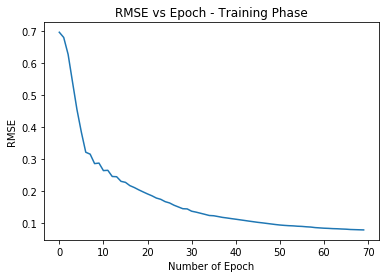

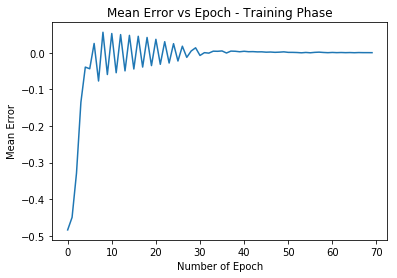

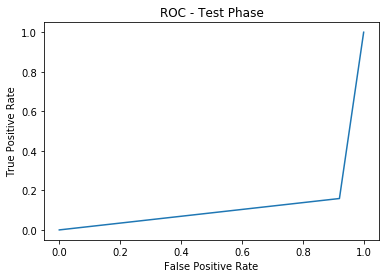

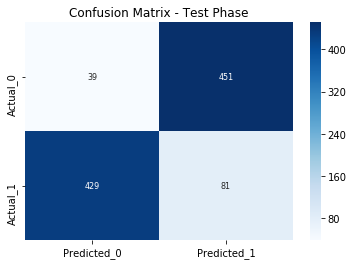

Test Accuracy:  0.12
Elapsed Time For Training is:  8.608654022216797


In [150]:
# Implementation of Adam Optimization
#*****************************************************************************************

start_time = time.time()                                    # Start the time to check the execution time

# Starting model with training of network
pca = NeuralNet(train_x, train_y, test_x, test_y)
pca.trainNN()

# Use the trained model to predict digits
# Testing the model once we have statisfied with the result of training
# Note: Test set or held out set is never used to evaluate the model during the training phase
pca.predict_digit()

# Check performance by plotting RMSE and Mean Error (Mean Error can be -ve or +ve)
plt.plot(pca.root_mse)
plt.title("RMSE vs Epoch - Training Phase")
plt.xlabel("Number of Epoch")
plt.ylabel("RMSE")
plt.show()


plt.plot(pca.rmse)
plt.title("Mean Error vs Epoch - Training Phase")
plt.xlabel("Number of Epoch")
plt.ylabel("Mean Error")
plt.show()

# Ploting ROC curve for testing phase or model evaluation
fpr, tpr, thresholds = sklearn.metrics.roc_curve(pca.test_y, pca.test_predict, 
                                                 pos_label=None, sample_weight=None, drop_intermediate=True)
plt.plot(fpr, tpr)
plt.title("ROC - Test Phase")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Generate Confusion Matrix
ax=plt.axes()
arr = metrics.confusion_matrix(pca.test_y, pca.test_predict, sample_weight=None)
con_df = pd.DataFrame(arr, columns = ["Predicted_0", "Predicted_1"], index=["Actual_0", "Actual_1"])
sns.heatmap(con_df, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Test Phase')
plt.show()

accpca = 1-np.sum(abs(pca.test_y - pca.test_predict))/len(pca.test_predict)
print('Test Accuracy: ', accpca)
elapsed_time5 = time.time() - start_time
print("Elapsed Time For Training is: ", elapsed_time5)

### Conclusion - Model Comparison:

From the below graph we can see that Mini Gradient Descent converges faster than any of the optimization. However, Adam optimization (Adaptive Moment Estimation) gives better result in terms of accuracy. Moreover, Adam also keeps exponentially decaying average of past gradients, similar to momentum. 

In my opinion ReLU can be useful for deep learning ie more than 2 hidden layers. Which is effective against problem of Vanishing gradient during backpropogation. But, in this case Sigmoid activation function gives better result (only 2 hiden layer).

PCA reduces the dimensions/features 700 to 400, hence the execution or training time is much lesser. However, it is important to notice that small variance is dropped while seleting the Principal components. Here 5% of variation is dropped i.e. only 95% of variations are captured. It is a trade off between computation and Accuracy. Hence PCA give accuracy of only 81% (if we increase the epoch it gives approximately 86% accuracy). 




<b><u>Summary:</u></b>

Test Accuracy - GD:  0.954   
Test Accuracy - mini GD:  0.954   
Test Accuracy - Adam Optimization:  0.084   
Test Accuracy - ReLU with Adam Opt:  0.946   
Test Accuracy - PCA 0.081    


Time Elapsed - GD:  35.437031269073486   
Time Elapsed - mini GD:  35.554786682128906   
Time Elapsed - Adam Optimization:  44.296812295913696   
Time Elapsed - ReLU with Adam Opt:  45.52885460853577   
Time Elapsed - PCA:  8.93569040298462    

Ref: http://ruder.io/optimizing-gradient-descent/index.html#adam

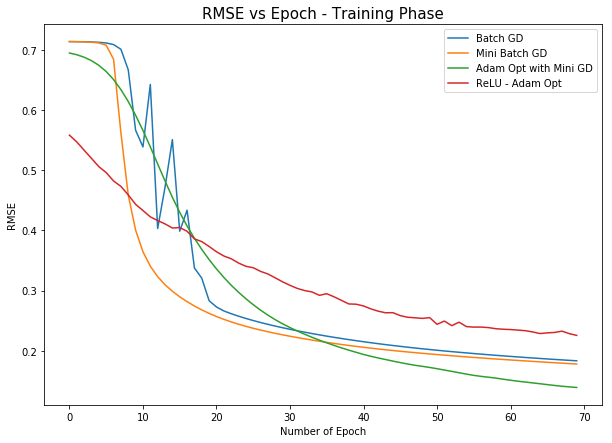

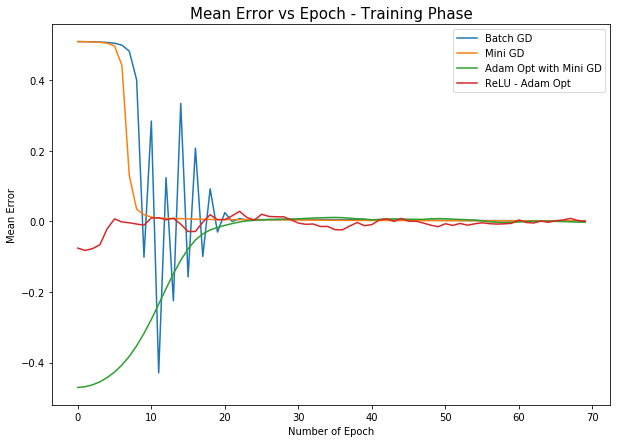

Test Accuracy - GD:  0.946
Test Accuracy - mini GD:  0.942
Test Accuracy - Adam Optimization:  0.972
Test Accuracy - ReLU with Adam Opt:  0.947
Test Accuracy - PCA 0.12
Time Elapsed - GD:  30.23016667366028
Time Elapsed - mini GD:  31.755859375
Time Elapsed - Adam Optimization:  41.58455228805542
Time Elapsed - ReLU with Adam Opt:  34.200576305389404
Time Elapsed - PCA:  8.608654022216797


In [151]:
def modelComparisions():
    
    #************************************************************************************************************#
    #                              Plot of Root Mean Squared Error
    #***********************************************************************************************************#
    plt.figure(figsize=(10,7))
    plt.plot(batch.root_mse, label="Batch GD" )
    plt.plot(mini.root_mse, label="Mini Batch GD" )
    plt.plot(adam.root_mse, label="Adam Opt with Mini GD" )
    plt.plot(relu.root_mse, label="ReLU - Adam Opt")
    plt.legend()
    plt.title("RMSE vs Epoch - Training Phase", size=15)
    plt.xlabel("Number of Epoch")
    plt.ylabel("RMSE")
    plt.show()


    #************************************************************************************************************#
    #                              Plot of Mean Error
    #***********************************************************************************************************#
    plt.figure(figsize=(10,7))
    plt.plot(batch.rmse, label="Batch GD")
    plt.plot(mini.rmse, label="Mini GD")
    plt.plot(adam.rmse, label="Adam Opt with Mini GD")
    plt.plot(relu.rmse, label="ReLU - Adam Opt")
    plt.legend()
    plt.title("Mean Error vs Epoch - Training Phase", size=15)
    plt.xlabel("Number of Epoch")
    plt.ylabel("Mean Error")
    plt.show()

    
    #************************************************************************************************************#
    #                              Print Test Accuracy and Time Elapsed for all the models
    #**********************************************************************************************************
    print("Test Accuracy - GD: ", accgd)
    print("Test Accuracy - mini GD: ", accminigd)
    print("Test Accuracy - Adam Optimization: ", accadam)
    print("Test Accuracy - ReLU with Adam Opt: ", accrelu)
    print("Test Accuracy - PCA", accpca)
    
    
    print("Time Elapsed - GD: ", elapsed_time1)
    print("Time Elapsed - mini GD: ", elapsed_time2)
    print("Time Elapsed - Adam Optimization: ", elapsed_time3)
    print("Time Elapsed - ReLU with Adam Opt: ", elapsed_time4)
    print("Time Elapsed - PCA: ", elapsed_time5)
    
modelComparisions()

In [156]:
test_y

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
    